In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Make plots pretty
plt.style.use('ggplot')
sns.set_palette('Set2')
%matplotlib inline


In [4]:
df = pd.read_csv('eda.csv', encoding='ISO-8859-1')  # ISO-8859-1 fixes character issues

In [5]:
print("Shape of data:", df.shape)

Shape of data: (9551, 21)


In [6]:
print(df['Restaurant Name'])

0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                NamlÛ± Gurme
9547               Ceviz AÛôacÛ±
9548                       Huqqa
9549                Aôôk Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9551, dtype: object


In [7]:
print("\nColumn types:\n", df.dtypes)


Column types:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [8]:
 df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent.round(2)
}).sort_values(by='Missing Values', ascending=False)

print("\nMissing Values Summary:\n")
print(missing_df[missing_df['Missing Values'] > 0])


Missing Values Summary:

          Missing Values  Percentage (%)
Cuisines               9            0.09


In [10]:
df_clean = df.dropna()


In [12]:
df_clean = df.dropna(axis=1)


In [11]:
df_clean = df.dropna(subset=['Cuisines', 'Aggregate rating'])

In [13]:
df.shape

(9551, 21)

In [ ]:
#Top Cities by Number of Restaurants

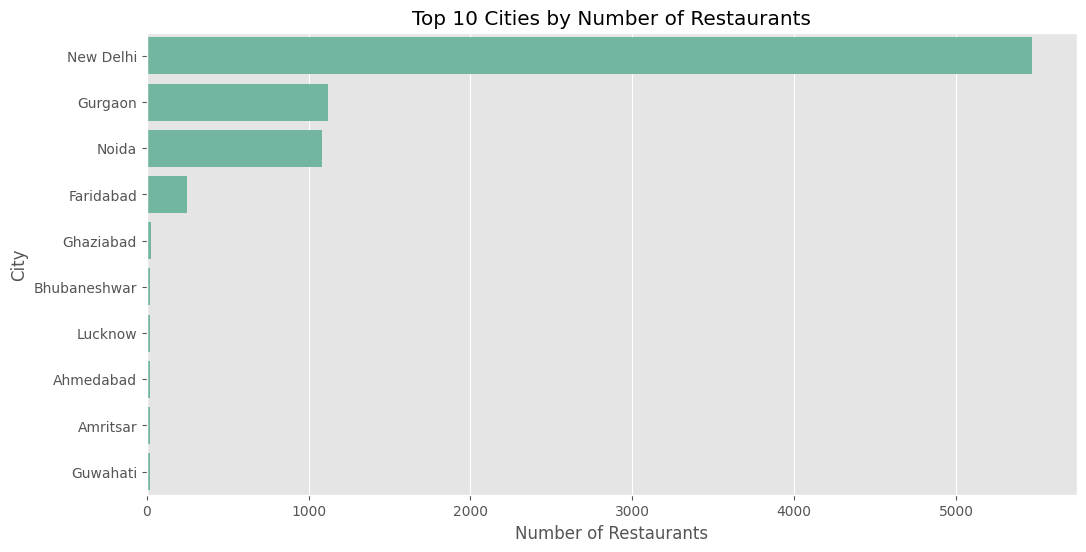

In [14]:
plt.figure(figsize=(12,6))
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()


In [ ]:
#Distribution of Price Range

/tmp/ipython-input-15-141397894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Price range', palette='Set2')


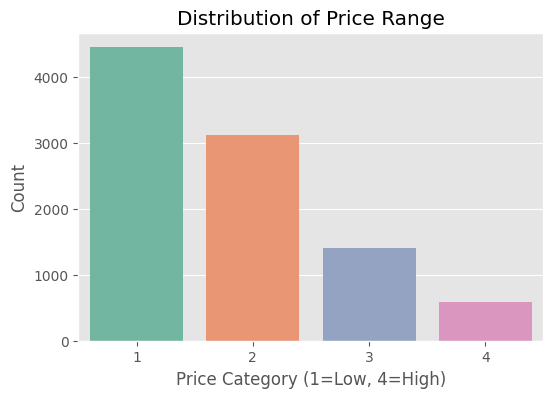

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Price range', palette='Set2')
plt.title('Distribution of Price Range')
plt.xlabel('Price Category (1=Low, 4=High)')
plt.ylabel('Count')
plt.show()


In [ ]:
#Most Common Cuisines

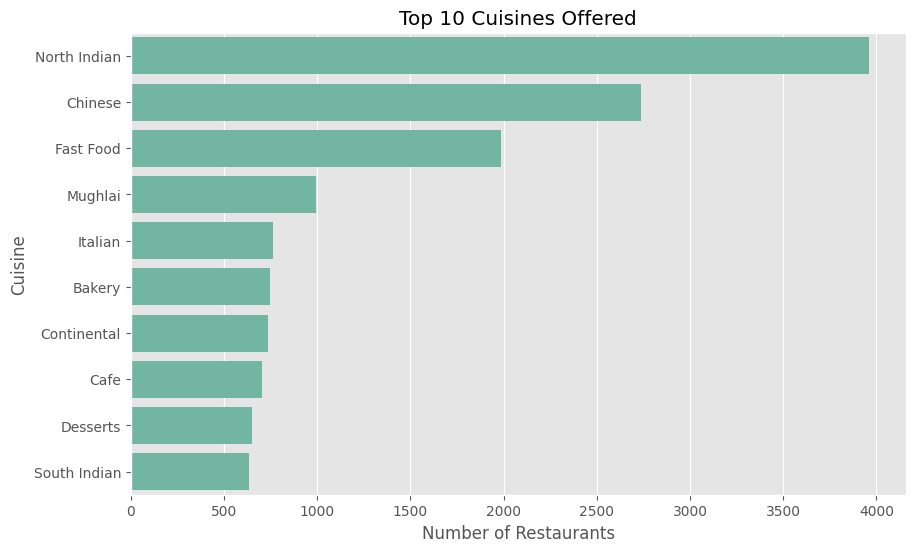

In [16]:
from collections import Counter

# Split multi-cuisine entries and count
cuisine_list = df['Cuisines'].dropna().str.split(', ')
all_cuisines = [cuisine for sublist in cuisine_list for cuisine in sublist]
top_cuisines = Counter(all_cuisines).most_common(10)

# Convert to DataFrame for plotting
cuisine_df = pd.DataFrame(top_cuisines, columns=['Cuisine', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=cuisine_df, y='Cuisine', x='Count')
plt.title('Top 10 Cuisines Offered')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


In [17]:
#Aggregate Rating Distribution

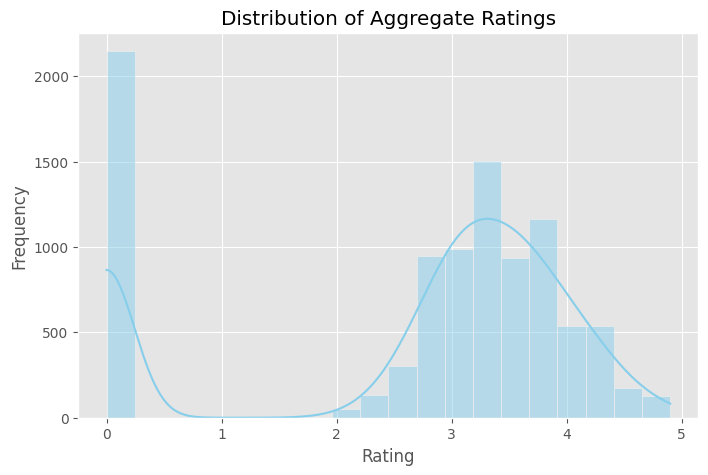

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


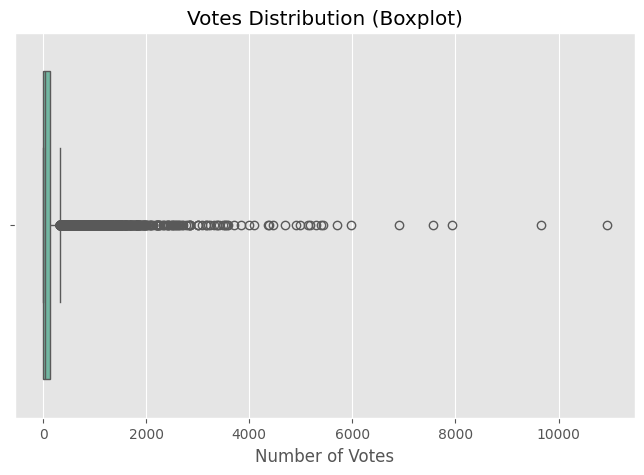

In [19]:
#Votes Distribution
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Votes')
plt.title('Votes Distribution (Boxplot)')
plt.xlabel('Number of Votes')
plt.show()



In [ ]:
#Bivariate Analysis

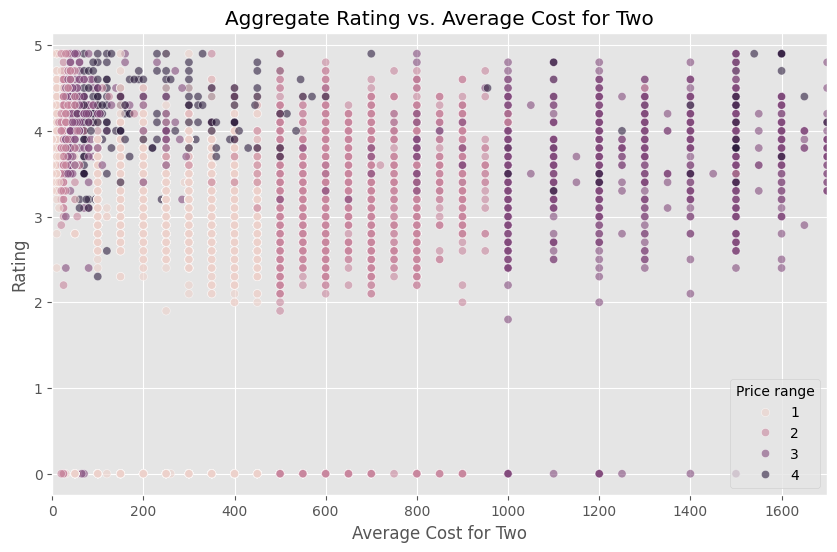

In [20]:
#Rating vs Average Cost for Two
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Average Cost for two', y='Aggregate rating', hue='Price range', alpha=0.6)
plt.title('Aggregate Rating vs. Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Rating')
plt.xlim(0, df['Average Cost for two'].quantile(0.95))  # Zoom in to remove outliers
plt.show()


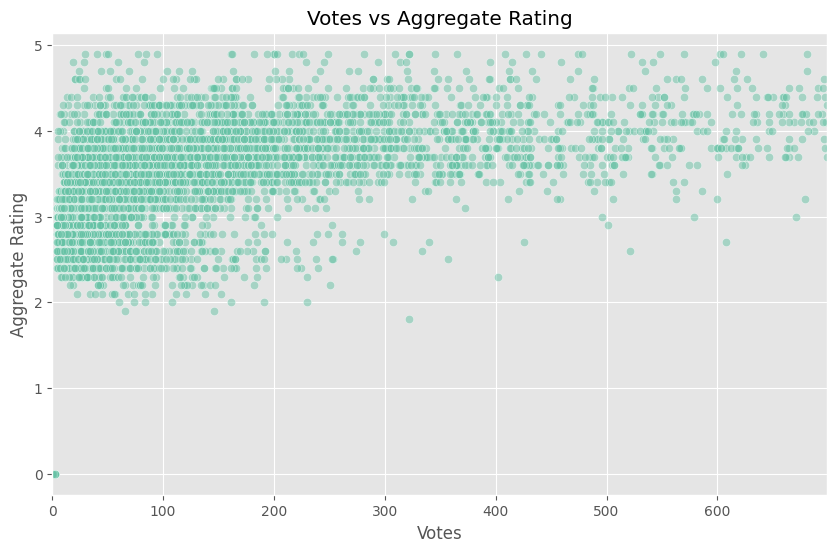

In [21]:
# Votes vs Aggregate Rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.5)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.xlim(0, df['Votes'].quantile(0.95))  # Optional: limit extreme values
plt.show()


In [22]:
#Price Range vs Rating (Boxplot)

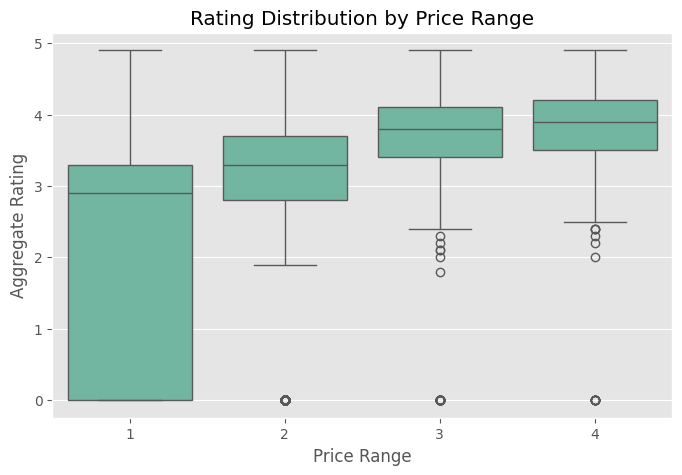

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Price range', y='Aggregate rating')
plt.title('Rating Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()


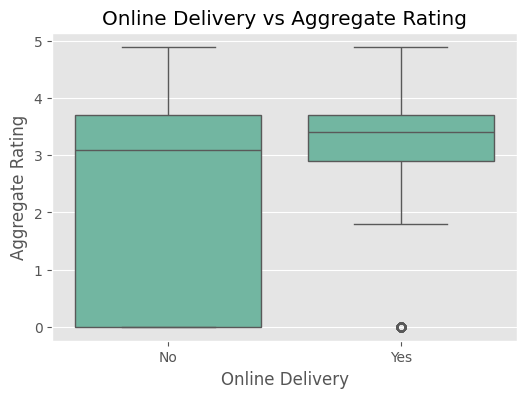

In [24]:
#Online Delivery vs Rating
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Has Online delivery', y='Aggregate rating')
plt.title('Online Delivery vs Aggregate Rating')
plt.xlabel('Online Delivery')
plt.ylabel('Aggregate Rating')
plt.show()


In [ ]:
#Online Delivery vs Rating

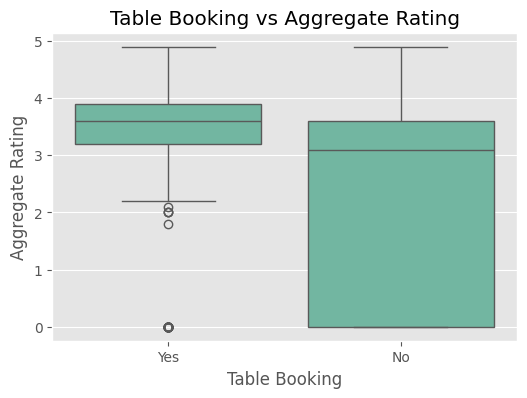

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Has Table booking', y='Aggregate rating')
plt.title('Table Booking vs Aggregate Rating')
plt.xlabel('Table Booking')
plt.ylabel('Aggregate Rating')
plt.show()


In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation matrix
print(corr_matrix)


                      Restaurant ID  Country Code  Longitude  Latitude  \
Restaurant ID              1.000000      0.148471  -0.226081 -0.052081   
Country Code               0.148471      1.000000  -0.698299  0.019792   
Longitude                 -0.226081     -0.698299   1.000000  0.043207   
Latitude                  -0.052081      0.019792   0.043207  1.000000   
Average Cost for two      -0.001693      0.043225   0.045891 -0.111088   
Price range               -0.134540      0.243327  -0.078939 -0.166688   
Aggregate rating          -0.326212      0.282189  -0.116818  0.000516   
Votes                     -0.147023      0.154530  -0.085101 -0.022962   

                      Average Cost for two  Price range  Aggregate rating  \
Restaurant ID                    -0.001693    -0.134540         -0.326212   
Country Code                      0.043225     0.243327          0.282189   
Longitude                         0.045891    -0.078939         -0.116818   
Latitude                 

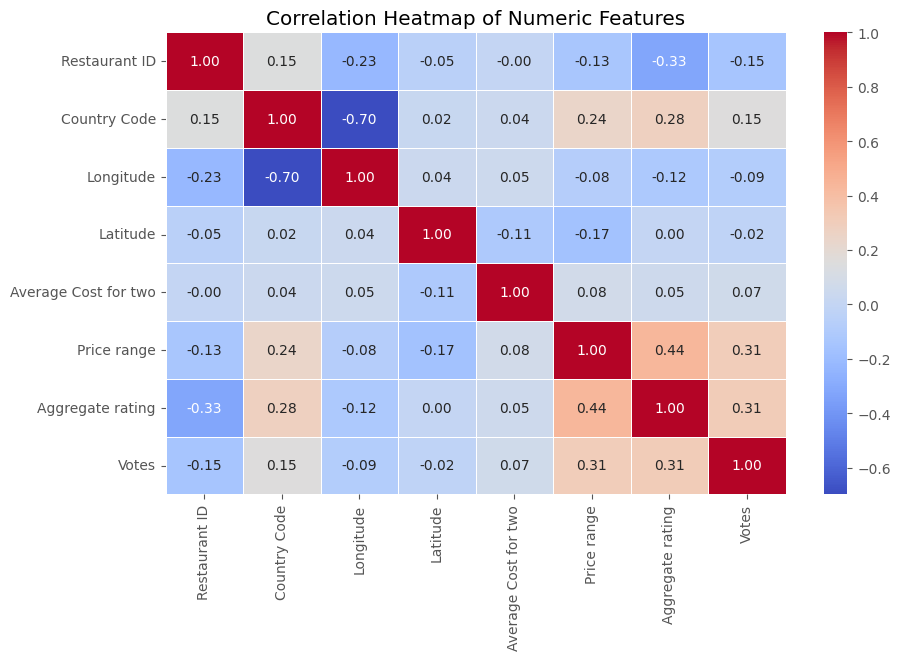

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [28]:
# Optional: Remove outliers above 99th percentile
df = df[df['Votes'] < df['Votes'].quantile(0.99)]
df = df[df['Average Cost for two'] < df['Average Cost for two'].quantile(0.99)]


In [29]:
df.to_csv('/content/cleaned_eda.csv', index=False)


In [ ]:
##  Final Summary: Restaurant EDA Project (Python)

This project presents an Exploratory Data Analysis (EDA) on a dataset of over 9,500 restaurants collected from various Indian cities. The primary objective was to uncover patterns in restaurant distribution, customer ratings, cuisine preferences, and service features like online delivery and table booking.

###  Key Insights:

1. **Top Cities by Restaurant Count:**
   - The highest number of restaurants are found in **New Delhi**, **Gurgaon**, and **Noida**, highlighting the food service density in the NCR region.

2. **Most Common Cuisines:**
   - **North Indian**, **Chinese**, and **Fast Food** are the top-served cuisines across the dataset, making them prime candidates for menu optimization and promotional campaigns.

3. **Rating Trends:**
   - Most restaurants fall in the **3.0 to 4.5** aggregate rating range.
   - High-end restaurants do not necessarily have higher ratings; mid-priced restaurants (₹₹) often receive better user satisfaction.

4. **Votes vs Ratings:**
   - A **positive correlation** exists between the number of votes and restaurant rating, indicating that more trusted restaurants receive higher user engagement.

5. **Online Delivery & Table Booking:**
   - Restaurants offering **online delivery** and **table booking** show slightly **higher average ratings**, suggesting that convenience features influence customer satisfaction.

6. **Price Range & Cost:**
   - A strong correlation is seen between **price range** and **average cost for two**, as expected.
   - However, higher cost does not guarantee a higher rating.

---

###  Tools Used:
- **Python**, **Pandas**, **NumPy**
- **Seaborn**, **Matplotlib** for visualization
- **Google Colab** for development

---

###  Business Use Case:
These findings can support food delivery platforms (like Zomato/Swiggy) or restaurant chains in:
- City-wise expansion strategies
- Cuisine-specific marketing
- Improving features like delivery & table booking
